# Multiple Scales Examples - Rayleigh's Equation 

We will approximate the following Rayleigh's equation using the multiple scale method 

$$
\begin{gather*}
    \ddot{x} + \epsilon\left(\dfrac{1}{3}\dot{x}^3 - \dot{x} \right) + x = 0
\end{gather*}
$$

with the initial conditions 

$$ 
\begin{gather*}
    x(0) = a\\
    \dot{x}(0) = 0
\end{gather*}
$$

First order approximation

In [35]:
import sympy as sp
from sympy.simplify.fu import TR0, TR5, TR7, TR8, TR11
from math import factorial

In [17]:
# Functions for multiple scales 

# Function for Time operator 
def Dt(f, n, Ts, e=sp.Symbol('epsilon')):
    if n==1:
        return sp.expand(sum([e**i * sp.diff(f, T_i) for i, T_i in enumerate(Ts)]))
    return Dt(Dt(f, 1, Ts, e), n-1, Ts, e)

def collect_epsilon(f, e=sp.Symbol('epsilon')):
    N = sp.degree(f, e)
    f_temp = f
    collected_dict = {}
    for i in range(N, 0, -1):
        collected_term = f_temp.coeff(e**i)
        collected_dict[e**i] = collected_term
        delete_terms = sp.expand(e**i * collected_term)
        f_temp -= delete_terms
    collected_dict[e**0] = f_temp
    return collected_dict

The scales are defined as 
\begin{gather*}
    T_0 = t, \phantom{---} T_1 = \epsilon t
\end{gather*}
where $T_0$ is greatly faster than $T_1$. The time derivative is then defined to be 
\begin{align*}
    \dfrac{d}{dt} &= \dfrac{\partial}{\partial T_0}\dfrac{\partial T_0}{\partial t} + \dfrac{\partial}{\partial T_1}\dfrac{\partial T_1}{\partial t} + \cdots\\
    &= \dfrac{\partial}{\partial T_0} + \epsilon \dfrac{\partial}{\partial T_1} + \cdots\\
    \dfrac{d^2}{dt^2} &= \dfrac{\partial^2}{\partial T_0^2} + 2\epsilon \dfrac{\partial^2}{\partial T_0 \partial T_1} + \epsilon^2 \dfrac{\partial^2}{\partial T_1^2} + \cdots
\end{align*}
Here we abbreviate the differential expressions using the time operators 
\begin{gather*}
    D_0 = \dfrac{\partial}{\partial T_0}, \phantom{---} D_1 = \dfrac{\partial}{\partial T_1}.
\end{gather*}
Then the EOM becomes 
\begin{gather*}
    D_0^2 x + 2\epsilon D_0D_1 x + \epsilon^2 D_1 x + \epsilon\left[ \dfrac{1}{3}\left( D_0 x + \epsilon D_1 x\right)^3 + \left(D_0x + \epsilon D_1 x\right) \right] + x = 0
\end{gather*}
with the initial conditions of 
\begin{gather*}
    x(0) = a, \phantom{---} \dfrac{x}{T_0} + \epsilon\dfrac{x}{T_1} = 0 \phantom{---} \textrm{for } \phantom{-} T_0 = T_1 = 0
\end{gather*}
Now seeking for a asymptotic approximation for $x$ of the form 
\begin{gather*}
    x(t) \equiv x(T_0, T_1; \epsilon) \approx x_o(T_0,T_1) + \epsilon x(T_0,T_1)
\end{gather*}


In [20]:
N = 1

# Define the symbolic parameters
e = sp.symbols('epsilon')
Ti = sp.symbols('T_(0:' + str(N+1) + ')', real=True)
Di = sp.symbols('D_(0:' + str(N+1) + ')', real=True)
x = sp.Symbol('x')
x0 = sp.Function('x_0')(*Ti)
x1 = sp.Function('x_1')(*Ti)

# Expansion for x(t)
x_e = x0 + epsilon*x1
x_e

epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)

In [24]:
# EOM

EOM = (Di[0]**2*x + 2*e*Di[0]*Di[1]*x + e**2*Di[1]*x + 
      e*((Di[0]*x + e*Di[1]*x)**3/3 + (Di[0]*x+e*Di[1]*x)) + x)
EOM = sp.Eq(EOM, 0)
EOM

Eq(D_0**2*x + 2*D_0*D_1*epsilon*x + D_1*epsilon**2*x + epsilon*(D_0*x + D_1*epsilon*x + (D_0*x + D_1*epsilon*x)**3/3) + x, 0)

In [25]:
# Substitute the asymptotic approximation 
EOM1 = EOM.subs(x, x_e)
EOM1

Eq(D_0**2*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)) + 2*D_0*D_1*epsilon*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)) + D_1*epsilon**2*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)) + epsilon*(D_0*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)) + D_1*epsilon*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)) + (D_0*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)) + D_1*epsilon*(epsilon*x_1(T_0, T_1) + x_0(T_0, T_1)))**3/3) + epsilon*x_1(T_0, T_1) + x_0(T_0, T_1), 0)

In [26]:
# Expand the equation 
EOM1 = sp.expand(EOM1)
EOM1

Eq(D_0**3*epsilon**4*x_1(T_0, T_1)**3/3 + D_0**3*epsilon**3*x_0(T_0, T_1)*x_1(T_0, T_1)**2 + D_0**3*epsilon**2*x_0(T_0, T_1)**2*x_1(T_0, T_1) + D_0**3*epsilon*x_0(T_0, T_1)**3/3 + D_0**2*D_1*epsilon**5*x_1(T_0, T_1)**3 + 3*D_0**2*D_1*epsilon**4*x_0(T_0, T_1)*x_1(T_0, T_1)**2 + 3*D_0**2*D_1*epsilon**3*x_0(T_0, T_1)**2*x_1(T_0, T_1) + D_0**2*D_1*epsilon**2*x_0(T_0, T_1)**3 + D_0**2*epsilon*x_1(T_0, T_1) + D_0**2*x_0(T_0, T_1) + D_0*D_1**2*epsilon**6*x_1(T_0, T_1)**3 + 3*D_0*D_1**2*epsilon**5*x_0(T_0, T_1)*x_1(T_0, T_1)**2 + 3*D_0*D_1**2*epsilon**4*x_0(T_0, T_1)**2*x_1(T_0, T_1) + D_0*D_1**2*epsilon**3*x_0(T_0, T_1)**3 + 2*D_0*D_1*epsilon**2*x_1(T_0, T_1) + 2*D_0*D_1*epsilon*x_0(T_0, T_1) + D_0*epsilon**2*x_1(T_0, T_1) + D_0*epsilon*x_0(T_0, T_1) + D_1**3*epsilon**7*x_1(T_0, T_1)**3/3 + D_1**3*epsilon**6*x_0(T_0, T_1)*x_1(T_0, T_1)**2 + D_1**3*epsilon**5*x_0(T_0, T_1)**2*x_1(T_0, T_1) + D_1**3*epsilon**4*x_0(T_0, T_1)**3/3 + 2*D_1*epsilon**3*x_1(T_0, T_1) + 2*D_1*epsilon**2*x_0(T_0, T_1) 

Collect the $\epsilon$ terms by their order


In [28]:
# Collect the epsilon terms 
epsilon_Eq = collect_epsilon(EOM1.lhs)

In [30]:
e0 = epsilon_Eq[e**0]
e0eq = sp.Eq(e0, 0)
e0eq

Eq(D_0**2*x_0(T_0, T_1) + x_0(T_0, T_1), 0)

In [31]:
e1 = epsilon_Eq[e**1]
e1eq = sp.Eq(e1, 0)
e1eq

Eq(D_0**3*x_0(T_0, T_1)**3/3 + D_0**2*x_1(T_0, T_1) + 2*D_0*D_1*x_0(T_0, T_1) + D_0*x_0(T_0, T_1) + x_1(T_0, T_1), 0)

The respective intial conditions for $x$ and $\dot{x}$ are given by 
\begin{align*}
    x_0 = a, & \phantom{--} \dfrac{\partial x_0}{\partial T_0} = 0 \phantom{---} \textrm{for } \phantom{-} T_0 = T_1 = 0\\
    x_1 = 0, & \phantom{--} \dfrac{\partial x_1}{\partial T_0} = -\dfrac{\partial x_0}{\partial T_1} \phantom{---} \textrm{for } \phantom{-} T_0 = T_1 = 0\\
\end{align*}

Since $T_0$ and $T_1$ are being treated as an independent variable temporarily, the differential equation above are partial differential equations for a function of $x_0$ of two variables $T_0$ and $T_1$. However, since no derivatives with respect to $T_1$ appear in the equation of $O(1)$ collected for $\epsilon$ this equation can be regarded as instead as an ordinary differential equation for a function of $T_0$ regarding $T_1$ as an auxiliary parameter. Thus, the general solution for $x_0$ can be expressed as the following 

\begin{gather*}
    x_0 = A_0(T_1)\cos T_0 + B_0(T_1)\sin T_0
\end{gather*}

in which the coefficients for the sine and consine terms can be found using the initial conditions 

\begin{gather*}
    A_0(0) = a \phantom{---} \textrm{ and } \phantom{---} B_0(0) = 0
\end{gather*}

If we take the derivative with respect to $T_0$ we have 

\begin{gather*}
    D_0 x_0 = -A_0(T_1)\sin T_0 + B_0(T_1)\cos T_0
\end{gather*}

and 

\begin{gather*}
    D_0D_1 x_0 = \dfrac{\partial }{\partial T_1}\left( \dfrac{\partial x_0}{\partial T_0}\right) = -D_1 A_0\sin T_0  + D_1 B_0\cos T_0  
\end{gather*}

Substituting these into the equation collected from the EOM with respect to $O(\epsilon)$ we obtain the following relationship

In [39]:
A0, B0 = sp.symbols('A_0 B_0')
x0_g = A0*sp.cos(Ti[0]) + B0*sp.sin(Ti[0])
D0x0 = sp.diff(x0_g, Ti[0])
D0D1x0 = -Di[1]*A0*sp.sin(Ti[0]) + Di[1]*B0*sp.cos(Ti[0])

e1eq_update = -D0x0 - 2*D0D1x0 - D0x0**3/3
e1eq_update = sp.expand(e1eq_update)
e1eq_update = sp.expand(TR8(sp.expand(TR7(TR5(e1eq_update)))))
e1eq_update

A_0**3*sin(T_0)/4 - A_0**3*sin(3*T_0)/12 - A_0**2*B_0*cos(T_0)/4 + A_0**2*B_0*cos(3*T_0)/4 + A_0*B_0**2*sin(T_0)/4 + A_0*B_0**2*sin(3*T_0)/4 + 2*A_0*D_1*sin(T_0) + A_0*sin(T_0) - B_0**3*cos(T_0)/4 - B_0**3*cos(3*T_0)/12 - 2*B_0*D_1*cos(T_0) - B_0*cos(T_0)

To have the secular terms vanish we let 
\begin{gather*}
    2D_1A_0 + A_0 + \dfrac{1}{4}A_0^3 + \dfrac{1}{4}A_0B_0^2= 0\\
    2D_1B_0 + B_0 + \dfrac{1}{4}B_0^3 + \dfrac{1}{4}A_0^2B_0= 0
\end{gather*}
Now if we solve these ordinary differential equations we have

In [138]:
# Dummuy variable C0 
C0 = sp.Function('C_0')(Ti[1])
D0 = sp.Function('D_0')(Ti[1])
a = sp.Symbol('a', real=True)
temp1 = sp.Eq(2*sp.diff(C0, Ti[1]) + C0 + C0**3/4 + C0*D0**2/4, 0)
temp2 = sp.Eq(2*sp.diff(D0, Ti[1]) + D0 + D0**3/4 + C0**2*D0/4, 0)
res = sp.dsolve([temp1, temp2])

In [139]:
res[0]

Eq(C_0(T_1), 2*sqrt((-sqrt(exp(C2))*exp(T_1/2) + sqrt(exp(C2))*exp(C2 + 3*T_1/2) + exp(C2 + T_1) - 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [140]:
res[1]

Eq(D_0(T_1), 2*C1*sqrt((-sqrt(exp(C2))*exp(T_1/2) + sqrt(exp(C2))*exp(C2 + 3*T_1/2) + exp(C2 + T_1) - 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [141]:
res[2]

Eq(C_0(T_1), -2*sqrt((sqrt(exp(C2))*exp(T_1/2) - sqrt(exp(C2))*exp(C2 + 3*T_1/2) + exp(C2 + T_1) - 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [142]:
res[3]

Eq(D_0(T_1), -2*C1*sqrt((sqrt(exp(C2))*exp(T_1/2) - sqrt(exp(C2))*exp(C2 + 3*T_1/2) + exp(C2 + T_1) - 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [143]:
res[4]

Eq(C_0(T_1), 2*sqrt((sqrt(exp(C2))*exp(T_1/2) - sqrt(exp(C2))*exp(C2 + 3*T_1/2) + exp(C2 + T_1) - 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [144]:
res[5]

Eq(D_0(T_1), 2*C1*sqrt((sqrt(exp(C2))*exp(T_1/2) - sqrt(exp(C2))*exp(C2 + 3*T_1/2) + exp(C2 + T_1) - 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [145]:
res[6]

Eq(C_0(T_1), -2*sqrt(-(sqrt(exp(C2))*exp(T_1/2) - sqrt(exp(C2))*exp(C2 + 3*T_1/2) - exp(C2 + T_1) + 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

In [146]:
res[7]

Eq(D_0(T_1), -2*C1*sqrt(-(sqrt(exp(C2))*exp(T_1/2) - sqrt(exp(C2))*exp(C2 + 3*T_1/2) - exp(C2 + T_1) + 1)/(-2*C1**2*exp(C2 + T_1) + C1**2*exp(2*C2 + 2*T_1) + C1**2 - 2*exp(C2 + T_1) + exp(2*C2 + 2*T_1) + 1)))

Now if we solve these ordinary differential equations we have 

$$
\begin{gather*}
    A_0 =2 \sqrt{\frac{- \sqrt{e^{C_{2}}} e^{\frac{T_{1}}{2}} + \sqrt{e^{C_{2}}} e^{C_{2} + \frac{3 T_{1}}{2}} + e^{C_{2} + T_{1}} - 1}{- 2 C_{1}^{2} e^{C_{2} + T_{1}} + C_{1}^{2} e^{2 C_{2} + 2 T_{1}} + C_{1}^{2} - 2 e^{C_{2} + T_{1}} + e^{2 C_{2} + 2 T_{1}} + 1}}\\[0.4cm]
    B_0 = 2 C_{1} \sqrt{\frac{- \sqrt{e^{C_{2}}} e^{\frac{T_{1}}{2}} + \sqrt{e^{C_{2}}} e^{C_{2} + \frac{3 T_{1}}{2}} + e^{C_{2} + T_{1}} - 1}{- 2 C_{1}^{2} e^{C_{2} + T_{1}} + C_{1}^{2} e^{2 C_{2} + 2 T_{1}} + C_{1}^{2} - 2 e^{C_{2} + T_{1}} + e^{2 C_{2} + 2 T_{1}} + 1}}
\end{gather*}
$$

Applying the initial conditions $a_0 = a$ and $b_0 = 0$ of we have

\begin{gather*}
    A_0 = 2\sqrt{\dfrac{-e^{\frac{T_1}{2}}+e^{\frac{3T_1}{2}} + e^{T_1} - 1}{-2a^2e^{T_1} + a^2e^{2T_1} + a^2 -2e^{T_1}+e^{2T_1} + 1}}\\
    B_0 = aA_0
\end{gather*}

Then we finally have 

\begin{align*}
    x(t) &= 2\sqrt{\dfrac{-e^{\frac{\epsilon t}{2}}+e^{\frac{3\epsilon t}{2}} + e^{\epsilon t} - 1}{-2a^2e^{\epsilon t} + a^2e^{2\epsilon t} + a^2 -2e^{\epsilon t}+e^{2\epsilon t} + 1}}\cos t \\
    & \phantom{---} + 2a\sqrt{\dfrac{-e^{\frac{\epsilon t}{2}}+e^{\frac{3\epsilon t}{2}} + e^{\epsilon t} - 1}{-2a^2e^{\epsilon t} + a^2e^{2\epsilon t} + a^2 -2e^{\epsilon t}+e^{2\epsilon t} + 1}}\sin t + O(\epsilon^2). 
\end{align*}

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, DOP853
from typing import List

In [164]:
# Generate phase plane of Rayleigh's equation to confirm limit cycle 

def rayleigh(t, x, e):
    return [x[1], -x[0] - e*(x[1]**3 / 3 - x[1])]

def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func, params):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y), *params.values())  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

def DEplot(sys: object, tspan: tuple, x0: List[List[float]], 
           x: np.ndarray, y: np.ndarray, params: dict):
    if len(tspan) != 3:
        raise Exception('tspan should be tuple of size 3: (min, max, number of points).')
    # Set up the figure the way we want it to look
    plt.figure(figsize=(12, 9))

    X1, X2, dx1, dx2, M = phasePlane(
        x, y, sys, params
    )

    # Quiver plot
    plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
    plt.grid()
    
    if tspan[0] < 0:
        t1 = np.linspace(0, tspan[0], tspan[2])
        t2 = np.linspace(0, tspan[1], tspan[2])
        if min(tspan) < 0:
            t_span1 = (np.max(t1), np.min(t1))
        else:
            t_span1 = (np.min(t1), np.max(t1))
        t_span2 = (np.min(t2), np.max(t2))
        for x0i in x0:
            sol1 = solve_diffeq(sys, t1, t_span1, x0i, params)
            plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
            sol2 = solve_diffeq(sys, t2, t_span2, x0i, params)
            plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
    else:
        t = np.linspace(tspan[0], tspan[1], tspan[2])
        t_span = (np.min(t), np.max(t))
        for x0i in x0:
            sol = solve_diffeq(sys, t, t_span, x0i, params)
            plt.plot(sol.y[0, :], sol.y[1, :], '-r')
        

    plt.xlim([np.min(x), np.max(x)])
    plt.ylim([np.min(y), np.max(y)])
    plt.show()

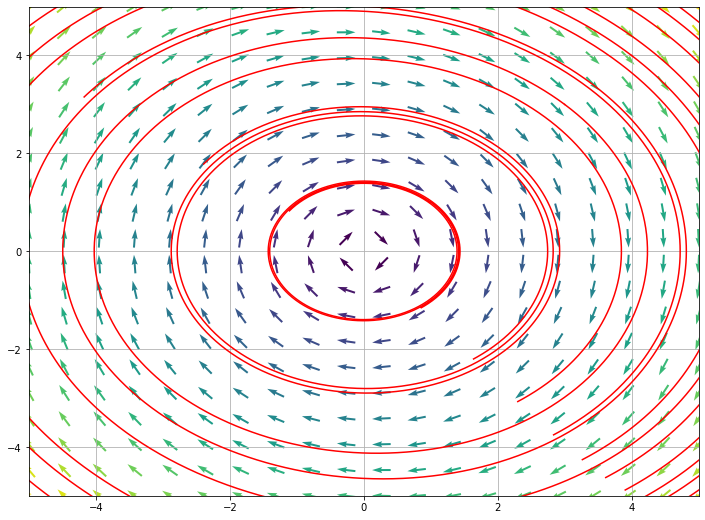

In [165]:
x10 = np.arange(0, 10, 1)
x20 = np.arange(0, 10, 1)
x0 = np.stack((x10, x20), axis=-1)

p = {'e': 0.01}

x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)

DEplot(rayleigh, (-8, 8, 1000), x0, x1, x2, p)

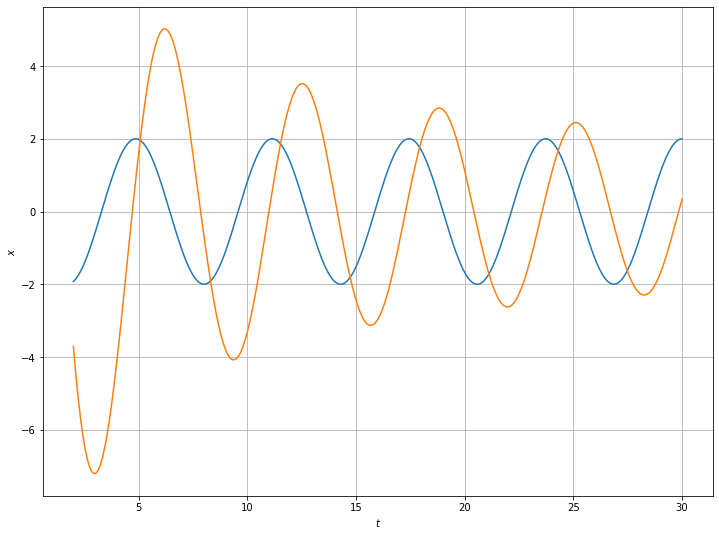

In [167]:
# Compare the approximation to the actual solution 
# let a = 2

tmax = 2
tmin = 30
tspan = np.linspace(tmin, tmax, 1000)
# ODE solver solution 
sol =  solve_diffeq(rayleigh, tspan, (tmin, tmax), [2, 0], p)

# Approximation 
def rayleigh_MS_O1(t, a, e):
    num = -np.exp(e*t/2) + np.exp(3*e*t/2) + np.exp(e*t) - 1
    den = -2*a**2*np.exp(e*t) + a**2*np.exp(2*e*t) + a**2 - 2*np.exp(e*t) + np.exp(2*e*t) + 1
    A0 = 2 * np.sqrt(num / den)
    B0 = a * A0
    return A0 * np.cos(t) #+ B0 * np.sin(t)

approx = rayleigh_MS_O1(tspan, 2, 0.01)

plt.figure(figsize=(12, 9))
plt.plot(tspan, sol.y[0, :])
plt.plot(tspan, approx)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

### you can see that it is a very crude approximation 